In [3]:
#Définition des librairies
library(jsonlite)
suppressPackageStartupMessages(library(Hmisc))
suppressPackageStartupMessages(library(rpart))
library(rpart.plot)

In [4]:
#Chargement du jeu de données
path="/home/user/Documents/STA211-Datamining/Projet_STA/"
Airbnb<-fromJSON(paste(path,"airbnb_V3.json",sep=""))
sapply(Airbnb,class)
summary(Airbnb)


_id           accommodates              bathrooms 
             "integer"            "character"            "character" 
              bed_type               bedrooms                   beds 
           "character"            "character"            "character" 
         property_type              room_type         arrondissement 
           "character"            "character"              "numeric" 
host_identity_verified      host_is_superhost          host_listings 
           "character"            "character"            "character" 
         host_response             host_since          cancel_policy 
           "character"            "character"            "character" 
      instant_bookable        availability_30       availability_365 
           "character"              "integer"              "integer" 
       availability_60        availability_90           first_review 
             "integer"              "integer"            "character" 
           last_review             nb_reviews    score_communication 
           "character"            "character"              "numeric" 
        score_location            score_other      reviews_per_month 
             "numeric"              "numeric"              "numeric" 
           total_price            price_level 
             "numeric"            "character"

      _id           accommodates        bathrooms           bed_type        
 Min.   :    2525   Length:41094       Length:41094       Length:41094      
 1st Qu.: 3688220   Class :character   Class :character   Class :character  
 Median : 7887020   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 8425822                                                           
 3rd Qu.:13304907                                                           
 Max.   :17968815                                                           
   bedrooms             beds           property_type       room_type        
 Length:41094       Length:41094       Length:41094       Length:41094      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

In [5]:

character_vars <- lapply(Airbnb, class) == "character"
Airbnb[, character_vars] <- lapply(Airbnb[, character_vars], as.factor)
#définition de la variable arrondissement comme qualitative
Airbnb$arrondissement <- as.factor(Airbnb$arrondissement ) 
sapply(Airbnb,class)

_id           accommodates              bathrooms 
             "integer"               "factor"               "factor" 
              bed_type               bedrooms                   beds 
              "factor"               "factor"               "factor" 
         property_type              room_type         arrondissement 
              "factor"               "factor"               "factor" 
host_identity_verified      host_is_superhost          host_listings 
              "factor"               "factor"               "factor" 
         host_response             host_since          cancel_policy 
              "factor"               "factor"               "factor" 
      instant_bookable        availability_30       availability_365 
              "factor"              "integer"              "integer" 
       availability_60        availability_90           first_review 
             "integer"              "integer"               "factor" 
           last_review             nb_reviews    score_communication 
              "factor"               "factor"              "numeric" 
        score_location            score_other      reviews_per_month 
             "numeric"              "numeric"              "numeric" 
           total_price            price_level 
             "numeric"               "factor"

In [6]:
Airbnb <- subset(Airbnb, select = -c(price_level) )
#Airbnb <- subset(Airbnb, select = -c(total_price) )

In [7]:
AirbnbTree <- rpart(total_price~.,data=Airbnb[2:28],control=rpart.control(minsplit=10,cp = 0.001, xval=10))
printcp(AirbnbTree)


Regression tree:
rpart(formula = total_price ~ ., data = Airbnb[2:28], control = rpart.control(minsplit = 10, 
    cp = 0.001, xval = 10))

Variables actually used in tree construction:
 [1] accommodates      arrondissement    availability_30   availability_365 
 [5] availability_60   availability_90   bathrooms         bed_type         
 [9] bedrooms          cancel_policy     host_listings     host_since       
[13] property_type     reviews_per_month room_type         score_other      

Root node error: 312836472/41094 = 7612.7

n= 41094 

          CP nsplit rel error  xerror     xstd
1  0.2755030      0   1.00000 1.00004 0.024482
2  0.1136717      1   0.72450 0.72457 0.019400
3  0.0398153      2   0.61083 0.61118 0.016234
4  0.0257536      3   0.57101 0.57137 0.016167
5  0.0169902      4   0.54526 0.54660 0.015561
6  0.0152413      5   0.52827 0.53019 0.015514
7  0.0137939      6   0.51302 0.51495 0.015456
8  0.0082931      7   0.49923 0.50116 0.015469
9  0.0079877      8   0.490

In [8]:
bestcp <- AirbnbTree$cptable[which.min(AirbnbTree$cptable[,"xerror"]),"CP"]

# Step3: Prune the tree using the best cp.
Airbnb_pruned <- prune(AirbnbTree, cp = bestcp)

In [11]:
# confusion matrix (training data)
residuals=Airbnb$total_price - predict(AirbnbTree,Airbnb)
SSE=sum(residuals^2)
SST=sum((Airbnb$total_price-mean(Airbnb$total_price))^2)
SSE/SST

[1] 0.3796408

In [12]:
opt <- which.min(AirbnbTree$cptable[,"xerror"])
SE1=AirbnbTree$cptable[opt,"xerror"]+AirbnbTree$cptable[opt,"xstd"]
SE1

[1] 0.4459493

In [13]:
which(AirbnbTree$cptable[,"xerror"]<=SE1)

21 22 23 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 
21 22 23 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 
48 49 50 51 52 
48 49 50 51 52

In [15]:
cp=AirbnbTree$cptable[10,'CP']
cp
bestcp

[1] 0.006790996

[1] 0.001109519

In [16]:
Airbnb_prune <- prune(AirbnbTree, cp = cp)


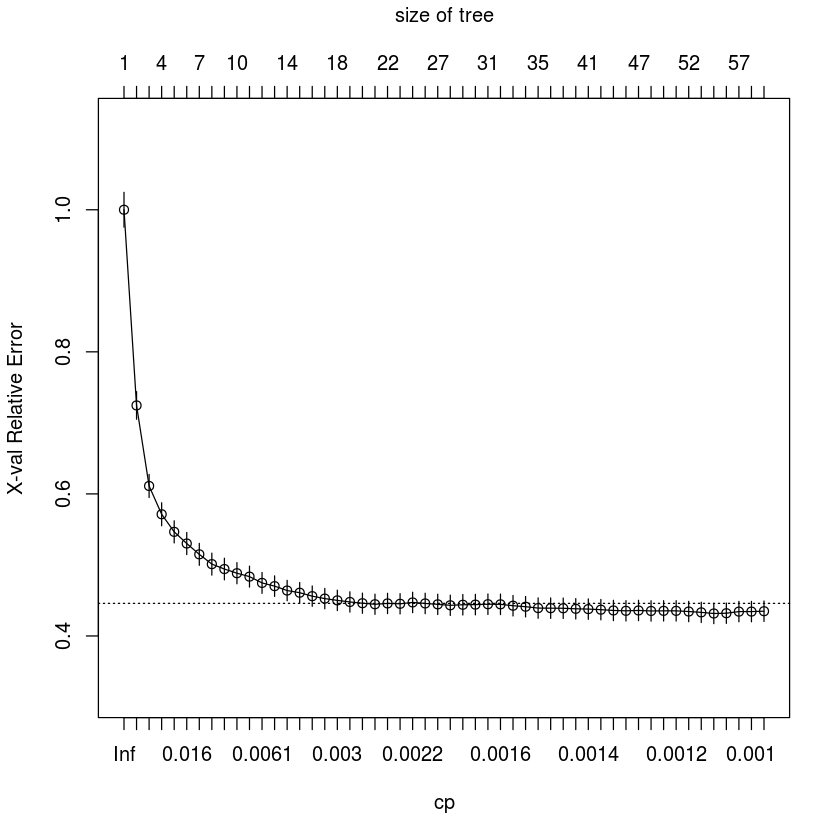

In [9]:
plotcp(AirbnbTree)

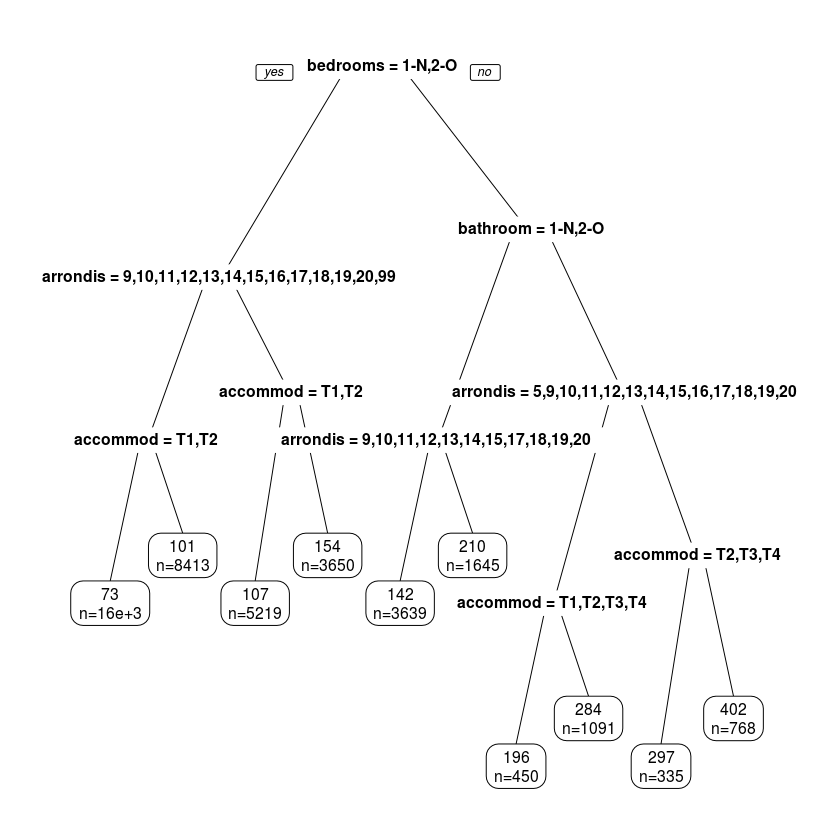

In [17]:

prp(Airbnb_prune,extra=1)

cex 0.675   xlim c(0, 1)   ylim c(0, 1)


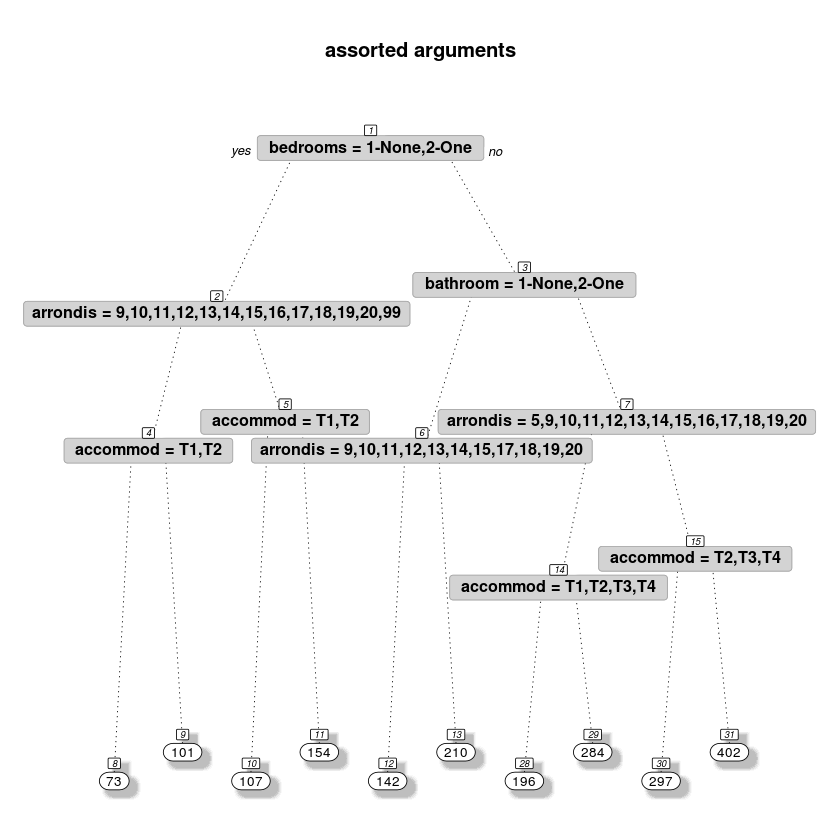

In [18]:

prp(Airbnb_prune, main="assorted arguments",
#    extra=106,           # display prob of survival and percent of obs
    nn=TRUE,             # display the node numbers
    fallen.leaves=TRUE,  # put the leaves on the bottom of the page
    shadow.col="gray",   # shadows under the leaves
    branch.lty=3,        # draw branches using dotted lines
    branch=.5,           # change angle of branch lines
    faclen=0,            # faclen=0 to print full factor names
    trace=1,             # print the automatically calculated cex
    split.cex=1.2,       # make the split text larger than the node text
#    split.prefix="is ",  # put "is " before split text
#    split.suffix="?",    # put "?" after split text
#    col=cols, border.col=cols,   # green if survived
    split.box.col="lightgray",   # lightgray split boxes (default is white)
    split.border.col="darkgray", # darkgray border on split boxes
    split.round=.5)              # round the split box corners a tad

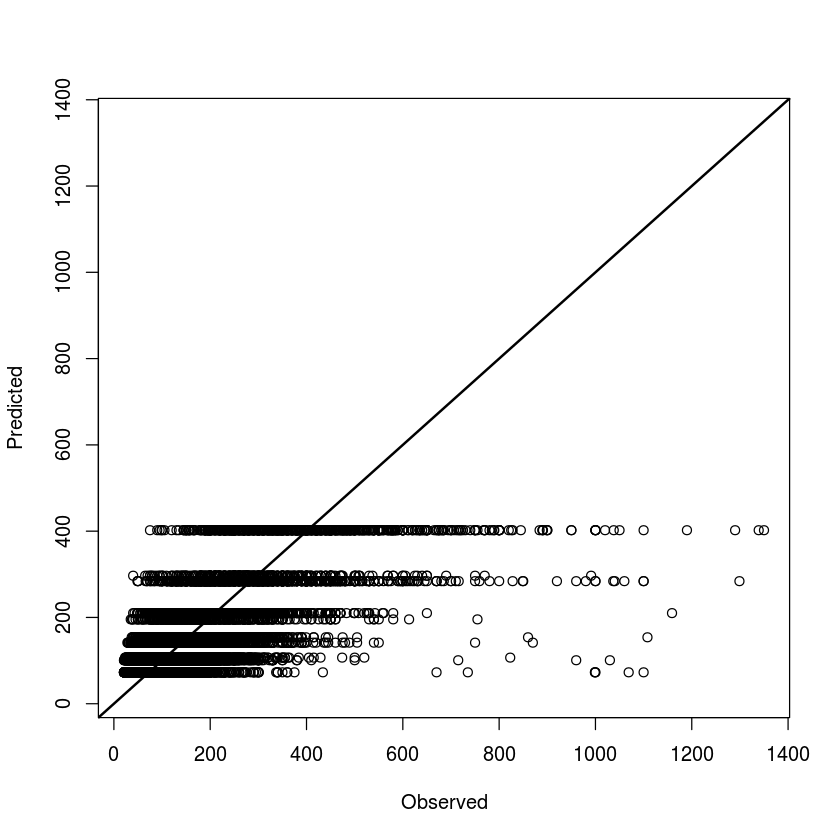

In [19]:
Airbnb_pred <- predict(Airbnb_prune, newdata = Airbnb)
xlim <- range(Airbnb$total_price)
ylim <- range(Airbnb_pred)
plot(Airbnb_pred ~ total_price, data = Airbnb, xlab = "Observed",  ylab = "Predicted", ylim = xlim, xlim = xlim)
abline(a = 0, b = 1,lwd=2)

Loading required package: grid
Loading required package: libcoin
Loading required package: mvtnorm


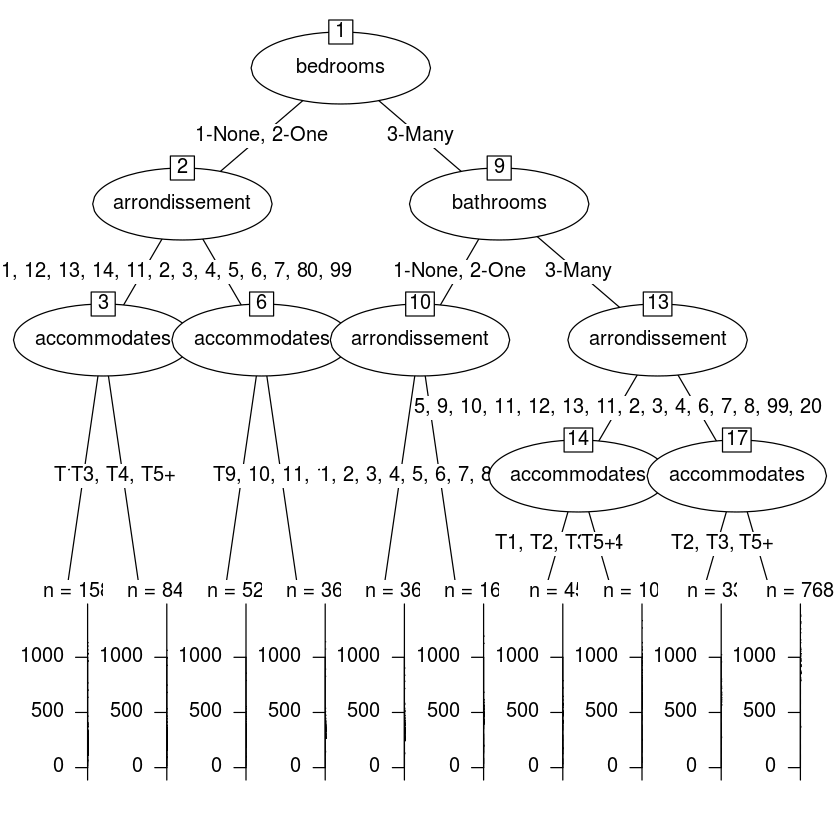

In [20]:
library(partykit)
plot(as.party(Airbnb_prune),  tp_args = list(id = FALSE))